In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install lifelines

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.2/349.2 kB 5.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.2/94.2 kB 6.6 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4031 sha256=deca5bf55e473887df954d0ab9f501d2c13b51ef124e91b793fd0b00679775b8
  Stored in directory: /root/.cache/pip/wheels/25/cc/e0/ef2969164144c899fedb22b338f6703e2b9cf46eeebf254991
Successfully built autograd-gamma


In [3]:
!pip install shapash

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 653.1/653.1 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 533.5/533.5 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 22.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 221.2/221.2 kB 21.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 642.7/642.7 kB 21.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 48.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 7.3 MB/s eta 0:00:00
  Created wheel for dash-renderer: filename=dash_renderer-1.8.3-py3-none-any.whl size=1013920 sha256=9dc90f536f6390377f07a59e0ec2fd86310c98adbbcc11cfac2b7144691ec735
  Stored in directory: /root/.cache/pip/wheels/6c/04/c8/22a0b5a26c3ecb61e17a27d4bbe7fad32d1417bbdbd4d46acf
  Created wheel for dash-daq: filename=dash_daq-0.5.0-py3-none-any.whl size

In [4]:
!pip install shapash[report]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.9/105.9 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 29.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.5/133.5 kB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 52.5 MB/s eta 0:00:00
  Attempting uninstall: jupyter-client
    Found existing installation: jupyter-client 6.1.12
    Uninstalling jupyter-client-6.1.12:
      Successfully uninstalled jupyter-client-6.1.12


In [ ]:
import pandas as pd
import numpy as np
from lifelines import KaplanMeierFitter
from lifelines.plotting import add_at_risk_counts
from lifelines.statistics import logrank_test
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [ ]:
from pandas.core.api import DataFrame
origin = pd.read_excel("./drive/MyDrive/Mémoire_Mine_Education/Survival_analysis_python/Data_model_mem.xlsx")

data = origin.copy()
data.loc[(data.depot == 'Oui'), 'depot'] = 1
data.loc[(data.depot == 'Non'), 'depot'] = 0
data.loc[(data.sexe == 'M'), 'sexe'] = 'Masculin'
data.loc[(data.sexe == 'F'), 'sexe'] = 'Féminin'
data.loc[(data.contrainte_motivation == 1), 'contrainte_motivation'] = 'Problème_motivation'
data.loc[(data.contrainte_motivation == 0), 'contrainte_motivation'] = 'Pas_de_problème_motivation'


data.shape

(181, 57)

In [ ]:
df = data[['temps_depot_complet', 'depot', 'sexe', 'loc_etud_sec', 'compos_seuh', 'approche', 'generation', 'qual_accomp', 'contrainte_motivation', 'projet_personnel',
           'choix_etud', 'education_fam']]

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 181 total observations, 97 right-censored observations>

Populating the interactive namespace from numpy and matplotlib


<Axes: xlabel='timeline'>

Text(0.5, 0, "Temps jusqu'au dépôt en mois")

Text(0, 0.5, 'Probabilité de survie')

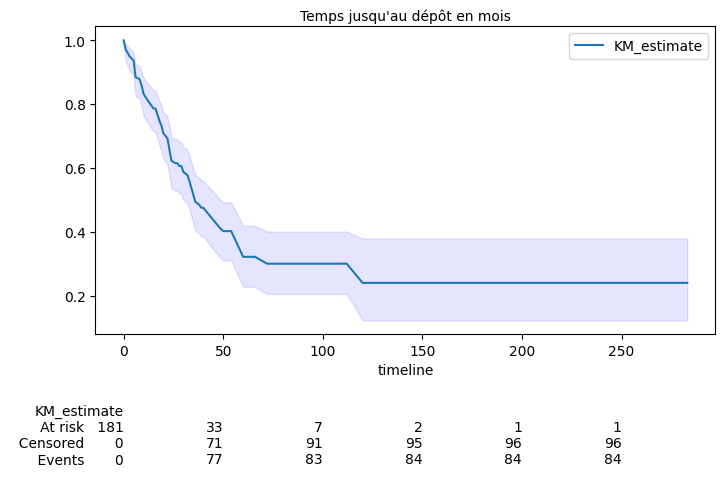

In [ ]:
# ax = subplot(111)
kmf = KaplanMeierFitter()
T = df['temps_depot_complet']
C = df['depot']
kmf.fit(T, C)

%pylab inline
figsize(8, 4)
ax = kmf.survival_function_.plot()
ci = kmf.confidence_interval_
ax.fill_between(ci.index, ci.iloc[:, 0], ci.iloc[:, 1], color='blue', alpha=0.10)
add_at_risk_counts(kmf, ax=ax)
plt.xlabel("Temps jusqu'au dépôt en mois")
plt.ylabel('Probabilité de survie')
plt.show()

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 181 total observations, 97 right-censored observations>

<Axes: xlabel='timeline'>

Text(0.5, 1.0, 'Courbe de survie Kaplan-Meier')

Text(0, 0.5, 'Probabilité de survie')

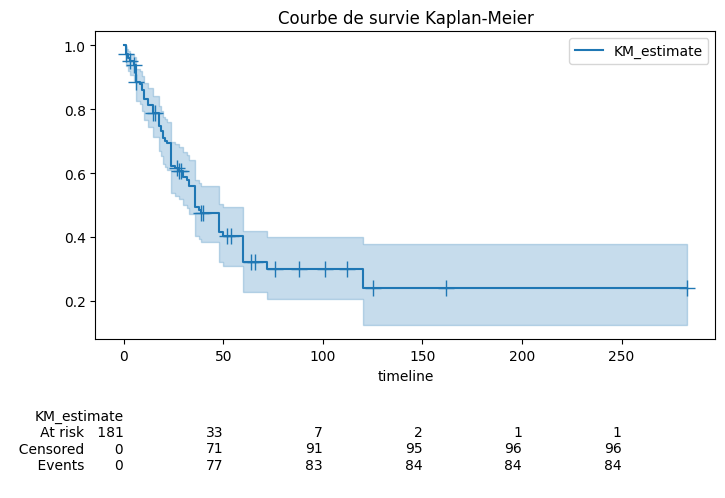

In [ ]:
ax = subplot(111)

# Créer un objet KaplanMeierFitter
kmf = KaplanMeierFitter()

# Ajuster le modèle aux données de survie
kmf.fit(durations=df['temps_depot_complet'], event_observed=df['depot'])

# Tracer la courbe de survie Kaplan-Meier
ax = kmf.plot_survival_function(show_censors=True)
add_at_risk_counts(kmf, ax=ax)
plt.title('Courbe de survie Kaplan-Meier')
# plt.legend('Kaplan-Meier estimate')
plt.ylabel('Probabilité de survie')

In [ ]:
from lifelines.utils import median_survival_times

median = kmf.median_survival_time_
median_confidence_interval = median_survival_times(kmf.confidence_interval_)
print(f"The number of months required to have at least 50% of probability for memoire submission: {median}.")
print("\nConfidence interval:")
median_confidence_interval

The number of months required to have at least 50% of probability for memoire submission: 36.0.

Confidence interval:


,KM_estimate_lower_0.95,KM_estimate_upper_0.95
0.5,32.0,50.0


<lifelines.KaplanMeierFitter:"Masculin", fitted with 123 total observations, 55 right-censored observations>

Text(0.5, 0, "Temps jusqu'à la soumission")

Text(0, 0.5, 'Survival probability')

<lifelines.KaplanMeierFitter:"Féminin", fitted with 58 total observations, 42 right-censored observations>

Text(0.5, 0, "Temps jusqu'à la soumission")

Text(0, 0.5, 'Survival probability')

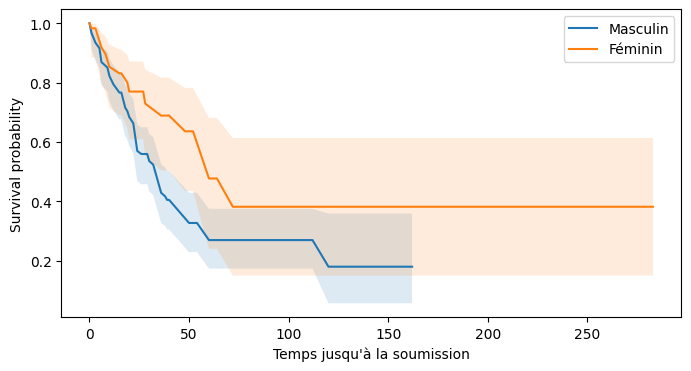

In [ ]:
ax = subplot(111)

for sex in df['sexe'].unique():
  sex_data = df[df['sexe'] == sex]
  kmf.fit(durations = sex_data['temps_depot_complet'], event_observed = sex_data['depot'], label=sex)
  ax = kmf.survival_function_.plot(ax=ax)
  ci = kmf.confidence_interval_
  ax.fill_between(ci.index, ci.iloc[:, 0], ci.iloc[:, 1], alpha=0.15)
  plt.xlabel("Temps jusqu'à la soumission")
  plt.ylabel('Survival probability')

<lifelines.KaplanMeierFitter:"Masculin", fitted with 123 total observations, 55 right-censored observations>

Text(0.5, 0, "Temps jusqu'à la soumission")

Text(0, 0.5, 'Survival probability')

<lifelines.KaplanMeierFitter:"Féminin", fitted with 58 total observations, 42 right-censored observations>

Text(0.5, 0, "Temps jusqu'à la soumission")

Text(0, 0.5, 'Survival probability')

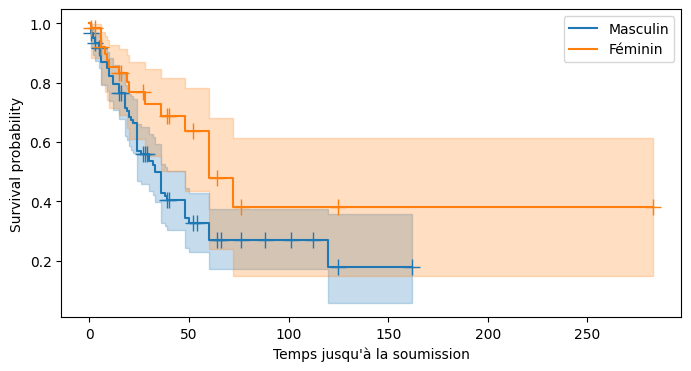

In [ ]:
ax = subplot(111)

for sex in df['sexe'].unique():
  sex_data = df[df['sexe'] == sex]
  kmf.fit(durations = sex_data['temps_depot_complet'], event_observed = sex_data['depot'], label=sex)
  ax = kmf.plot_survival_function(show_censors=True)
  plt.xlabel("Temps jusqu'à la soumission")
  plt.ylabel('Survival probability')

<lifelines.KaplanMeierFitter:"Masculin", fitted with 123 total observations, 55 right-censored observations>

<lifelines.KaplanMeierFitter:"Féminin", fitted with 58 total observations, 42 right-censored observations>

<Axes: xlabel='timeline'>

<Axes: xlabel='timeline'>

Text(0, 0.5, 'Probabilité de survie')

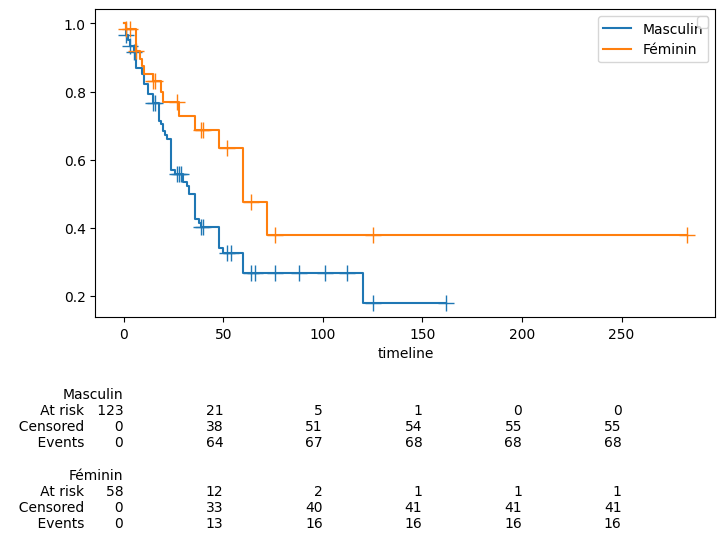

In [ ]:
# Créer un objet KaplanMeierFitter pour chaque groupe
kmf_male = KaplanMeierFitter()
kmf_female = KaplanMeierFitter()

# Ajuster le modèle aux données de survie pour chaque groupe
kmf_male.fit(durations=df.loc[df['sexe'] == 'Masculin', 'temps_depot_complet'],
             event_observed=df.loc[df['sexe'] == 'Masculin', 'depot'],
             label='Masculin')

kmf_female.fit(durations=df.loc[df['sexe'] == 'Féminin', 'temps_depot_complet'],
               event_observed=df.loc[df['sexe'] == 'Féminin', 'depot'],
               label='Féminin')

# Tracer les courbes de survie Kaplan-Meier pour chaque groupe
ax = kmf_male.plot_survival_function(ci_show = False, show_censors=True)
kmf_female.plot_survival_function(ax=ax, ci_show = False, show_censors=True)

# Ajouter la table des événements en bas du graphique
add_at_risk_counts(kmf_male, kmf_female, ax=ax)

# Personnaliser le graphique
# plt.title('Courbe de survie Kaplan-Meier par sexe')
# plt.xlabel('Temps')
plt.ylabel('Probabilité de survie')
plt.legend()
plt.show()

<lifelines.KaplanMeierFitter:"Public_non_UEH", fitted with 48 total observations, 20 right-censored observations>

Text(0.5, 0, "Temps jusqu'à la soumission")

Text(0, 0.5, 'Survival probability')

<lifelines.KaplanMeierFitter:"Public_UEH", fitted with 85 total observations, 46 right-censored observations>

Text(0.5, 0, "Temps jusqu'à la soumission")

Text(0, 0.5, 'Survival probability')

<lifelines.KaplanMeierFitter:"Privé", fitted with 48 total observations, 31 right-censored observations>

Text(0.5, 0, "Temps jusqu'à la soumission")

Text(0, 0.5, 'Survival probability')

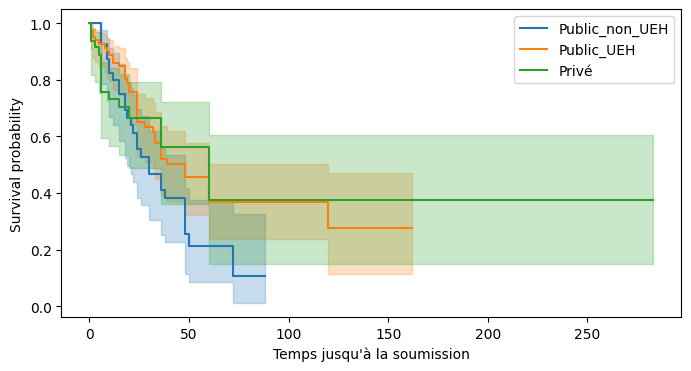

In [ ]:
ax = subplot(111)

for comp in df['compos_seuh'].unique():
  comp_data = df[df['compos_seuh'] == comp]
  kmf.fit(durations = comp_data['temps_depot_complet'], event_observed = comp_data['depot'], label=comp)
  ax = kmf.plot_survival_function(show_censors=False)
  plt.xlabel("Temps jusqu'à la soumission")
  plt.ylabel('Survival probability')

<lifelines.KaplanMeierFitter:"Génération après 2012", fitted with 134 total observations, 86 right-censored observations>

Text(0.5, 0, "Temps jusqu'à la soumission")

Text(0, 0.5, 'Survival probability')

<lifelines.KaplanMeierFitter:"Génération 2002-2011", fitted with 44 total observations, 10 right-censored observations>

Text(0.5, 0, "Temps jusqu'à la soumission")

Text(0, 0.5, 'Survival probability')

<lifelines.KaplanMeierFitter:"Génération 1990-1999", fitted with 3 total observations, 1 right-censored observations>

Text(0.5, 0, "Temps jusqu'à la soumission")

Text(0, 0.5, 'Survival probability')

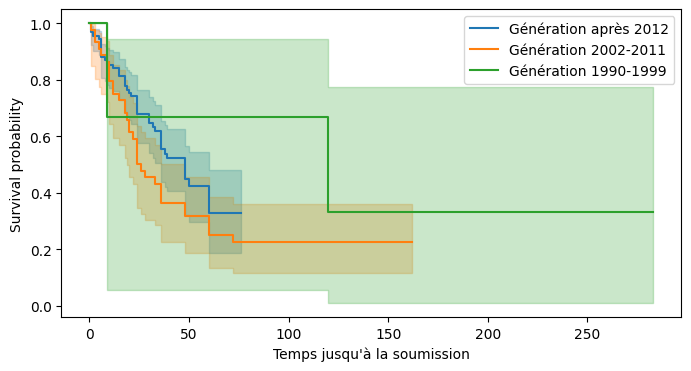

In [ ]:
ax = subplot(111)

for gen in df['generation'].unique():
  gen_data = df[df['generation'] == gen]
  kmf.fit(durations = gen_data['temps_depot_complet'], event_observed = gen_data['depot'], label=gen)
  ax = kmf.plot_survival_function(show_censors=False)
  plt.xlabel("Temps jusqu'à la soumission")
  plt.ylabel('Survival probability')

<lifelines.KaplanMeierFitter:"Pas_de_problème_motivation", fitted with 113 total observations, 48 right-censored observations>

<lifelines.KaplanMeierFitter:"Problème_motivation", fitted with 68 total observations, 49 right-censored observations>

<Axes: xlabel='timeline'>

<Axes: xlabel='timeline'>

Text(0, 0.5, 'Probabilité de survie')

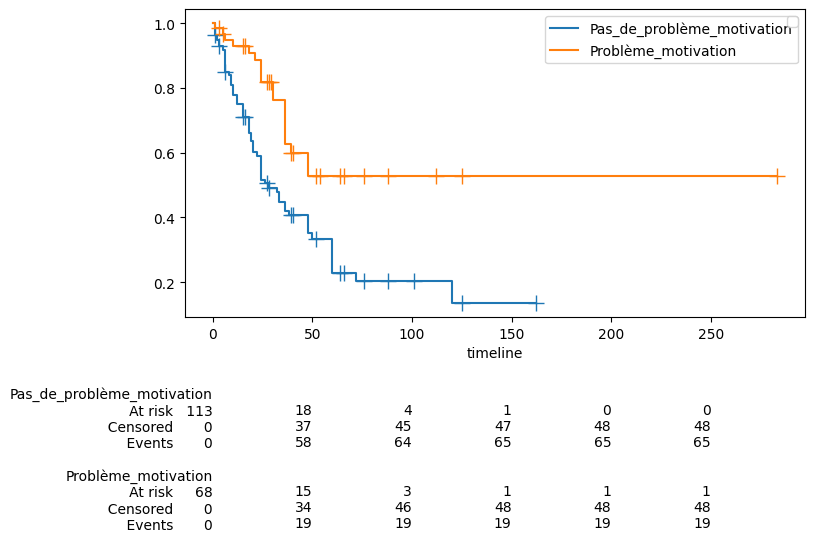

In [ ]:
# Créer un objet KaplanMeierFitter pour chaque groupe
kmf_motiv = KaplanMeierFitter()
kmf_no_motiv = KaplanMeierFitter()

# Ajuster le modèle aux données de survie pour chaque groupe
kmf_motiv.fit(durations=df.loc[df['contrainte_motivation'] == 'Pas_de_problème_motivation', 'temps_depot_complet'],
             event_observed=df.loc[df['contrainte_motivation'] == 'Pas_de_problème_motivation', 'depot'],
             label='Pas_de_problème_motivation')

kmf_no_motiv.fit(durations=df.loc[df['contrainte_motivation'] == 'Problème_motivation', 'temps_depot_complet'],
               event_observed=df.loc[df['contrainte_motivation'] == 'Problème_motivation', 'depot'],
               label='Problème_motivation')

# Tracer les courbes de survie Kaplan-Meier pour chaque groupe
ax = kmf_motiv.plot_survival_function(ci_show = False, show_censors=True)
kmf_no_motiv.plot_survival_function(ax=ax, ci_show = False, show_censors=True)

# Ajouter la table des événements en bas du graphique
add_at_risk_counts(kmf_motiv, kmf_no_motiv, ax=ax)

# Personnaliser le graphique
# plt.title('Courbe de survie Kaplan-Meier par sexe')
# plt.xlabel('Temps')
plt.ylabel('Probabilité de survie')
plt.legend()
plt.show()

<lifelines.KaplanMeierFitter:"Fort_appréciable", fitted with 24 total observations, 6 right-censored observations>

<lifelines.KaplanMeierFitter:"Moyen", fitted with 60 total observations, 28 right-censored observations>

<lifelines.KaplanMeierFitter:"Médiocre", fitted with 55 total observations, 36 right-censored observations>

<lifelines.KaplanMeierFitter:"Aucun", fitted with 42 total observations, 27 right-censored observations>

<Axes: xlabel='timeline'>

<Axes: xlabel='timeline'>

<Axes: xlabel='timeline'>

<Axes: xlabel='timeline'>

Text(0, 0.5, 'Probabilité de survie')

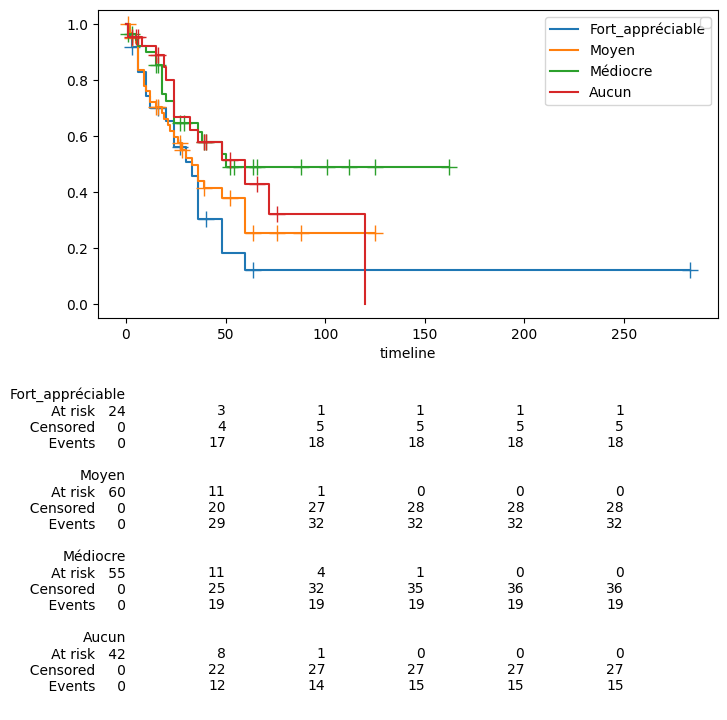

In [ ]:
# Créer un objet KaplanMeierFitter pour chaque groupe
kmf_appr = KaplanMeierFitter()
kmf_moyen = KaplanMeierFitter()
kmf_mediocre = KaplanMeierFitter()
kmf_aucun = KaplanMeierFitter()

# Ajuster le modèle aux données de survie pour chaque groupe
kmf_appr.fit(durations=df.loc[df['qual_accomp'] == 'Fort_appréciable', 'temps_depot_complet'],
             event_observed=df.loc[df['qual_accomp'] == 'Fort_appréciable', 'depot'],
             label='Fort_appréciable')

kmf_moyen.fit(durations=df.loc[df['qual_accomp'] == 'Moyen', 'temps_depot_complet'],
               event_observed=df.loc[df['qual_accomp'] == 'Moyen', 'depot'],
               label='Moyen')

kmf_mediocre.fit(durations=df.loc[df['qual_accomp'] == 'Médiocre', 'temps_depot_complet'],
               event_observed=df.loc[df['qual_accomp'] == 'Médiocre', 'depot'],
               label='Médiocre')

kmf_aucun.fit(durations=df.loc[df['qual_accomp'] == 'Aucun', 'temps_depot_complet'],
               event_observed=df.loc[df['qual_accomp'] == 'Aucun', 'depot'],
               label='Aucun')

# Tracer les courbes de survie Kaplan-Meier pour chaque groupe
ax = kmf_appr.plot_survival_function(ci_show = False, show_censors=True)
kmf_moyen.plot_survival_function(ax=ax, ci_show = False, show_censors=True)
kmf_mediocre.plot_survival_function(ax=ax, ci_show = False, show_censors=True)
kmf_aucun.plot_survival_function(ax=ax, ci_show = False, show_censors=True)

# Ajouter la table des événements en bas du graphique
add_at_risk_counts(kmf_appr, kmf_moyen, kmf_mediocre, kmf_aucun, ax=ax)

# Personnaliser le graphique
# plt.title('Courbe de survie Kaplan-Meier par sexe')
# plt.xlabel('Temps')
plt.ylabel('Probabilité de survie')
plt.legend()
plt.show()

<lifelines.KaplanMeierFitter:"AMP", fitted with 151 total observations, 82 right-censored observations>

<lifelines.KaplanMeierFitter:"Hors_AMP", fitted with 30 total observations, 15 right-censored observations>

<Axes: xlabel='timeline'>

<Axes: xlabel='timeline'>

Text(0, 0.5, 'Probabilité de survie')

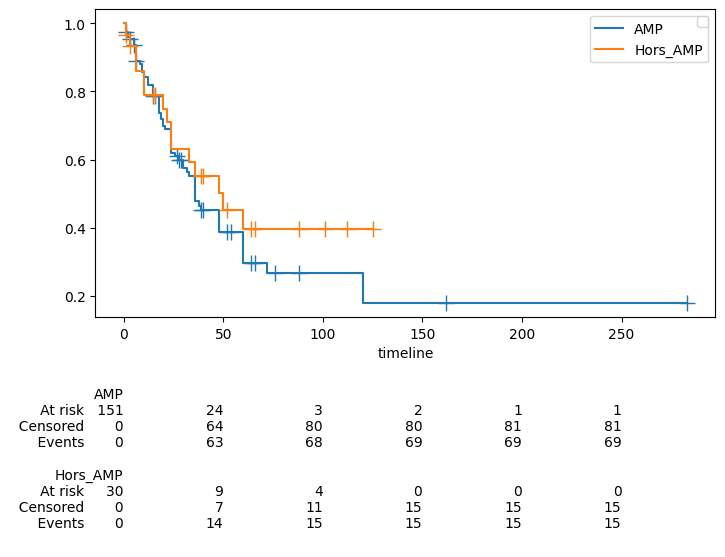

In [ ]:
# Créer un objet KaplanMeierFitter pour chaque groupe
kmf_AMP = KaplanMeierFitter()
kmf_H_AMP = KaplanMeierFitter()

# Ajuster le modèle aux données de survie pour chaque groupe
kmf_AMP.fit(durations=df.loc[df['loc_etud_sec'] == 'AMP', 'temps_depot_complet'],
             event_observed=df.loc[df['loc_etud_sec'] == 'AMP', 'depot'],
             label='AMP')

kmf_H_AMP.fit(durations=df.loc[df['loc_etud_sec'] == 'Hors_AMP', 'temps_depot_complet'],
               event_observed=df.loc[df['loc_etud_sec'] == 'Hors_AMP', 'depot'],
               label='Hors_AMP')

# Tracer les courbes de survie Kaplan-Meier pour chaque groupe
ax = kmf_AMP.plot_survival_function(ci_show = False, show_censors=True)
kmf_H_AMP.plot_survival_function(ax=ax, ci_show = False, show_censors=True)

# Ajouter la table des événements en bas du graphique
add_at_risk_counts(kmf_AMP, kmf_H_AMP, ax=ax)

# Personnaliser le graphique
# plt.title('Courbe de survie Kaplan-Meier par sexe')
# plt.xlabel('Temps')
plt.ylabel('Probabilité de survie')
plt.legend()
plt.show()

In [ ]:
data['loc_etud_sec'].unique()

array(['AMP', 'Hors_AMP'], dtype=object)

In [ ]:
df.columns

Index(['temps_depot_complet', 'depot', 'sexe', 'loc_etud_sec', 'compos_seuh',
       'approche', 'generation', 'qual_accomp', 'contrainte_motivation',
       'projet_personnel', 'choix_etud', 'education_fam'],
      dtype='object')

<lifelines.KaplanMeierFitter:"Masculin", fitted with 123 total observations, 55 right-censored observations>

<Axes: xlabel='timeline'>

<lifelines.KaplanMeierFitter:"Féminin", fitted with 58 total observations, 42 right-censored observations>

<Axes: xlabel='timeline'>

Text(0.5, 1.0, 'Courbe de survie par sexe')

<lifelines.KaplanMeierFitter:"Problème_motivation", fitted with 68 total observations, 49 right-censored observations>

<Axes: xlabel='timeline'>

<lifelines.KaplanMeierFitter:"Pas_de_problème_motivation", fitted with 113 total observations, 48 right-censored observations>

<Axes: xlabel='timeline'>

Text(0.5, 1.0, 'Courbe de survie par niveau_motivation')

<lifelines.KaplanMeierFitter:"Moyen", fitted with 60 total observations, 28 right-censored observations>

<Axes: xlabel='timeline'>

<lifelines.KaplanMeierFitter:"Médiocre", fitted with 55 total observations, 36 right-censored observations>

<Axes: xlabel='timeline'>

<lifelines.KaplanMeierFitter:"Aucun", fitted with 42 total observations, 27 right-censored observations>

<Axes: xlabel='timeline'>

<lifelines.KaplanMeierFitter:"Fort_appréciable", fitted with 24 total observations, 6 right-censored observations>

<Axes: xlabel='timeline'>

Text(0.5, 1.0, 'Courbe de survie par qualité_accompagnement')

<lifelines.KaplanMeierFitter:"AMP", fitted with 151 total observations, 82 right-censored observations>

<Axes: xlabel='timeline'>

<lifelines.KaplanMeierFitter:"Hors_AMP", fitted with 30 total observations, 15 right-censored observations>

<Axes: xlabel='timeline'>

Text(0.5, 1.0, 'Courbe de survie par localisation_étude_secondaire')

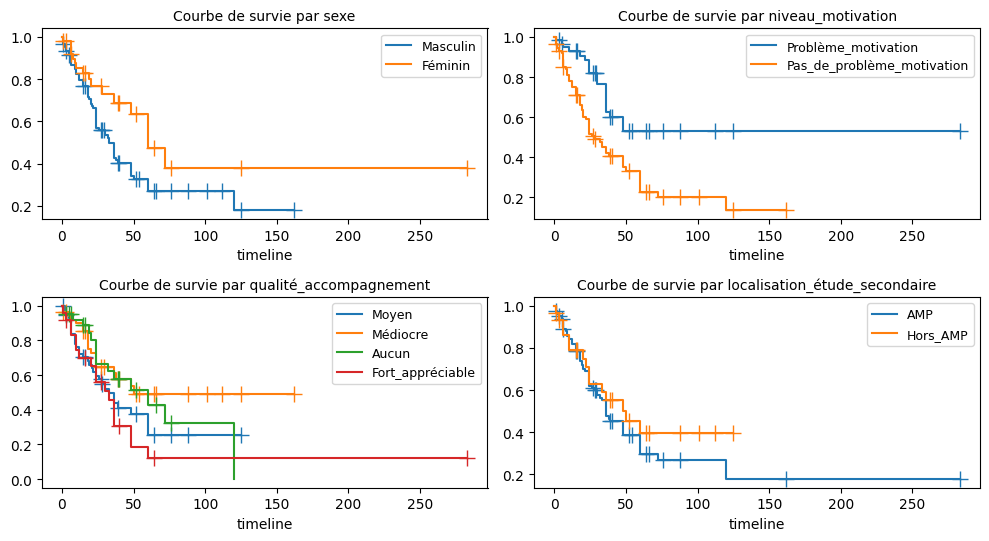

In [ ]:
num_rows = 2
num_cols = 2

# Créer la grille de graphiques avec une boucle for
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 6))
df1 = df.copy()

# Aplatir les axes pour itérer plus facilement
axes = axes.flatten()
df1.rename(columns = {'qual_accomp': 'qualité_accompagnement',
                     'loc_etud_sec': 'localisation_étude_secondaire',
                      'contrainte_motivation': 'niveau_motivation'}, inplace = True)

variables = ['sexe', 'niveau_motivation', 'qualité_accompagnement', 'localisation_étude_secondaire']
for variable, ax in zip(variables, axes.flatten()):
    kmf = KaplanMeierFitter()

    # Récupérer les modalités uniques de la variable
    modalites = df1[variable].unique()

    for modalite in modalites:
        subset = df1[df1[variable] == modalite]
        kmf.fit(durations=subset['temps_depot_complet'], event_observed=subset['depot'], label=modalite)
        kmf.plot_survival_function(ci_show=False, ax=ax, show_censors=True)

        # # Effectuer le test log-rank
        # results = logrank_test(durations_A=df[df[variable] == modalites[0]]['temps_depot_complet'],
        #                    durations_B=df[df[variable] == modalites[1]]['temps_depot_complet'],
        #                    event_observed_A=df[df[variable] == modalites[0]]['temps_depot_complet'],
        #                    event_observed_B=df[df[variable] == modalites[1]]['temps_depot_complet'])

    # Ajouter les résultats au sous-titre
    # p_value = results.p_value
    ax.set_title(f'Courbe de survie par {variable}', fontsize=10)
    ax.legend(fontsize=9)

# Personnaliser la figure
# fig.suptitle('Courbes de survie Kaplan-Meier pour différentes variables (sans intervalle de confiance)')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [ ]:
df.columns

Index(['temps_depot_complet', 'depot', 'sexe', 'loc_etud_sec', 'compos_seuh',
       'approche', 'generation', 'qual_accomp', 'contrainte_motivation',
       'projet_personnel', 'choix_etud', 'education_fam'],
      dtype='object')

### Log-rank test - Sexe

In [ ]:
# Diviser les données en deux groupes
group_A = df[df['sexe'] == 'Masculin']
group_B = df[df['sexe'] == 'Féminin']

# Effectuer le test de log-rank
results = logrank_test(group_A['temps_depot_complet'], group_B['temps_depot_complet'], event_observed_A=group_A['depot'], event_observed_B=group_B['depot'])

# Afficher les résultats
print(results.print_summary())

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           5.49 0.02      5.71

None


### Log-rank Test - Motivation

In [ ]:
# Diviser les données en deux groupes
group_A = df[df['contrainte_motivation'] == 'Pas_de_problème_motivation']
group_B = df[df['contrainte_motivation'] == 'Problème_motivation']

# Effectuer le test de log-rank
results = logrank_test(group_A['temps_depot_complet'], group_B['temps_depot_complet'], event_observed_A=group_A['depot'], event_observed_B=group_B['depot'])

# Afficher les résultats
print(results.print_summary())

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
          12.48 <0.005     11.25

None


### Log-rank Test - Localisation étude secondaire

In [ ]:
# Diviser les données en deux groupes
group_A = df[df['loc_etud_sec'] == 'AMP']
group_B = df[df['loc_etud_sec'] == 'Hors_AMP']

# Effectuer le test de log-rank
results = logrank_test(group_A['temps_depot_complet'], group_B['temps_depot_complet'], event_observed_A=group_A['depot'], event_observed_B=group_B['depot'])

# Afficher les résultats
print(results.print_summary())

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           0.79 0.37      1.42

None


### Log-rank test - Qualité accompagnement

In [ ]:
from lifelines.statistics import multivariate_logrank_test
# groupes = [df[df['qual_accomp'] == categorie] for categorie in df['qual_accomp'].unique()]

result = multivariate_logrank_test(df['temps_depot_complet'], df['qual_accomp'], df['depot'])
result.print_summary()

<lifelines.StatisticalResult: multivariate_logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 3
         test_name = multivariate_logrank_test

---
 test_statistic    p  -log2(p)
           6.95 0.07      3.76

In [ ]:
from lifelines.utils import survival_table_from_events

event_table = survival_table_from_events(df['temps_depot_complet'], event_observed=df['depot'])

event_table.reset_index(inplace = True)
event_table.head()

,event_at,removed,observed,censored,entrance,at_risk
0,0.0,0,0,0,181,181
1,1.0,8,5,3,0,181
2,2.0,2,2,0,0,173
3,3.0,24,2,22,0,171
4,5.0,3,2,1,0,147


In [ ]:
kmf = KaplanMeierFitter()
kmf.fit(durations=df['temps_depot_complet'], event_observed=df['depot'])
survival_table = kmf.survival_function_
survival_table.reset_index(inplace = True)
survival_table.rename(columns = {'timeline': 'event_at'}, inplace = True)
survival_table.head()

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 181 total observations, 97 right-censored observations>

,event_at,KM_estimate
0,0.0,1.000000
1,1.0,0.972376
2,2.0,0.961134
3,3.0,0.949893
4,5.0,0.936969


In [ ]:
survival_event = event_table.merge(survival_table, on = 'event_at', how = 'left')
survival_event.head()

,event_at,removed,observed,censored,entrance,at_risk,KM_estimate
0,0.0,0,0,0,181,181,1.000000
1,1.0,8,5,3,0,181,0.972376
2,2.0,2,2,0,0,173,0.961134
3,3.0,24,2,22,0,171,0.949893
4,5.0,3,2,1,0,147,0.936969


In [ ]:
survival_event.to_excel("Survival_Event_KM.xlsx", index = False)

In [ ]:
kmf_male.survival_function_.head()

,Masculin
timeline,
0.0,1.000000
1.0,0.967480
2.0,0.950942
3.0,0.934403
5.0,0.915900


In [ ]:
kmf_female.survival_function_.head()

,Féminin
timeline,
0.0,1.000000
1.0,0.982759
3.0,0.982759
6.0,0.918666
8.0,0.896793


In [ ]:
kmf_motiv.survival_function_.head()

,Pas_de_problème_motivation
timeline,
0.0,1.000000
1.0,0.964602
2.0,0.946402
3.0,0.928202
5.0,0.918327


In [ ]:
kmf_no_motiv.survival_function_.head()

,Problème_motivation
timeline,
0.0,1.000000
1.0,0.985294
3.0,0.985294
5.0,0.966704
6.0,0.947749


In [ ]:
kmf_AMP.survival_function_.head()

,AMP
timeline,
0.0,1.000000
1.0,0.973510
2.0,0.960082
3.0,0.953368
5.0,0.937610


In [ ]:
kmf_H_AMP.survival_function_.head()

,Hors_AMP
timeline,
0.0,1.000000
1.0,0.966667
3.0,0.932143
6.0,0.860440
10.0,0.788736


In [ ]:
kmf_appr.survival_function_.reset_index(inplace = True)
kmf_appr.survival_function_.rename(columns = {'timeline': 'Nombre de mois',
                                'Fort_appréciable': 'Qualification_type_Fort_appréciable'}, inplace = True)
kmf_appr.survival_function_.head()

,Nombre de mois,Qualification_type_Fort_appréciable
0,0.0,1.000000
1,1.0,0.958333
2,3.0,0.916667
3,6.0,0.829365
4,10.0,0.742063


In [ ]:
kmf_moyen.survival_function_.reset_index(inplace = True)
kmf_moyen.survival_function_.rename(columns = {'timeline': 'Nombre de mois',
                                'Moyen': 'Qualification_type_Moyen'}, inplace = True)
kmf_moyen.survival_function_.head()

,Nombre de mois,Qualification_type_Moyen
0,0.0,1.000000
1,1.0,1.000000
2,2.0,0.966102
3,3.0,0.949153
4,5.0,0.930169


In [ ]:
kmf_mediocre.survival_function_.reset_index(inplace = True)
kmf_mediocre.survival_function_.rename(columns = {'timeline': 'Nombre de mois',
                                'Médiocre': 'Qualification_type_Médiocre'}, inplace = True)
kmf_mediocre.survival_function_.head()

,Nombre de mois,Qualification_type_Médiocre
0,0.0,1.000000
1,1.0,0.963636
2,3.0,0.963636
3,5.0,0.941736
4,6.0,0.919835


In [ ]:
kmf_aucun.survival_function_.reset_index(inplace = True)
kmf_aucun.survival_function_.rename(columns = {'timeline': 'Nombre de mois',
                                               'Aucun': 'Qualification_type_Aucun'}, inplace = True)
kmf_aucun.survival_function_.head()

,Nombre de mois,Qualification_type_Aucun
0,0.0,1.000000
1,1.0,0.952381
2,3.0,0.952381
3,5.0,0.952381
4,6.0,0.952381


In [ ]:
pd.crosstab(df['sexe'], df['contrainte_motivation'])

contrainte_motivation,Pas_de_problème_motivation,Problème_motivation
sexe,,
Féminin,38,20
Masculin,75,48


In [ ]:
const = ['contrainte', 'contrainte_interet', 'contrainte_motivation',
       'contrainte_ordi', 'contrainte_elect', 'contrainte_internet',
       'contrainte_boulot', 'contrainte_fam', 'contrainte_sante',
       'contrainte_note', 'contrainte_finance', 'contrainte_autr_etud',
       'contrainte_sujet_recherche', 'contrainte_sujet_complexe',
       'contrainte_donnees', 'contrainte_analyse_donnees',
       'contrainte_encadrement', 'contrainte_emigration', 'contrainte_autre',
       'preciser_autr_contr', 'nombre_contrainte']

const2 = ['contrainte_interet', 'contrainte_motivation',
       'contrainte_ordi', 'contrainte_elect', 'contrainte_internet',
       'contrainte_boulot', 'contrainte_fam', 'contrainte_sante',
       'contrainte_note', 'contrainte_finance', 'contrainte_autr_etud',
       'contrainte_sujet_recherche', 'contrainte_sujet_complexe',
       'contrainte_donnees', 'contrainte_analyse_donnees',
       'contrainte_encadrement', 'contrainte_emigration', 'contrainte_autre']

from scipy.stats import chi2_contingency

# Initialisation du DataFrame pour stocker les résultats
results_df = pd.DataFrame(columns=['Contrainte', 'P-value'])

# Boucle for pour effectuer le test du chi-deux pour chaque contrainte
for column in const2:
    contingency_table = pd.crosstab(origin['depot'], origin[column])
    chi2, p, _, _ = chi2_contingency(contingency_table)

    # Ajout des résultats au DataFrame
    results_df = results_df.append({
        'Contrainte': column,
        'P-value': p
    }, ignore_index=True)

def sig_stat(value):
  if value < 0.1:
    return "significatif"
  else:
    return "non significatif"


results_df['Decision_csq'] = results_df['P-value'].map(sig_stat)
results_df.rename(columns = {'P-value': 'P-value_csq'}, inplace = True)
results_df


,Contrainte,P-value_csq,Decision_csq
0,contrainte_interet,0.024518,significatif
1,contrainte_motivation,0.000207,significatif
2,contrainte_ordi,0.396960,non significatif
3,contrainte_elect,0.707440,non significatif
4,contrainte_internet,1.000000,non significatif
5,contrainte_boulot,0.137358,non significatif
6,contrainte_fam,0.061308,significatif
7,contrainte_sante,0.250265,non significatif
8,contrainte_note,0.048154,significatif
9,contrainte_finance,0.204872,non significatif


In [ ]:
from scipy.stats import mannwhitneyu
results_df_mu = pd.DataFrame(columns=['Contrainte', 'P-value'])

for column in const2:
    _, p = mannwhitneyu(origin[origin['depot'] == 'Oui'][column], origin[origin['depot'] == 'Non'][column], alternative='two-sided')

    # Ajout des résultats au DataFrame
    results_df_mu = results_df_mu.append({
        'Contrainte': column,
        'P-value': p
    }, ignore_index=True)

results_df_mu['Decision_mu'] = results_df_mu['P-value'].map(sig_stat)
results_df_mu.rename(columns = {'P-value': 'P-value_mu'}, inplace = True)

# Affichage des résultats
results_df_mu

,Contrainte,P-value_mu,Decision_mu
0,contrainte_interet,0.010763,significatif
1,contrainte_motivation,0.000117,significatif
2,contrainte_ordi,0.280523,non significatif
3,contrainte_elect,0.585346,non significatif
4,contrainte_internet,0.972914,non significatif
5,contrainte_boulot,0.100543,non significatif
6,contrainte_fam,0.032952,significatif
7,contrainte_sante,0.137642,non significatif
8,contrainte_note,0.027805,significatif
9,contrainte_finance,0.141404,non significatif


In [ ]:
results_const = results_df.merge(results_df_mu, on = 'Contrainte', how = 'left')
results_fct = results_const[results_const['Decision_csq'] == 'significatif']
results_fct

,Contrainte,P-value_csq,Decision_csq,P-value_mu,Decision_mu
0,contrainte_interet,0.024518,significatif,0.010763,significatif
1,contrainte_motivation,0.000207,significatif,0.000117,significatif
6,contrainte_fam,0.061308,significatif,0.032952,significatif
8,contrainte_note,0.048154,significatif,0.027805,significatif
15,contrainte_encadrement,0.010910,significatif,0.007181,significatif
17,contrainte_autre,0.096768,significatif,0.062543,significatif


In [ ]:
results_df.to_excel("Significativité_contraintes_soumission.xlsx", index = False)

### Régression logistique

In [ ]:
reg_data = origin[['sexe', 'tranche_age', 'loc_etud_sec', 'type_etab_term', 'compos_seuh', 'etud_1', 'domaine_etud1',
       'autr_etud', 'approche',
       'generation', 'depot', 'qual_accomp', 'temps_emploi',
       'contrainte_interet', 'contrainte_motivation',
       'contrainte_ordi', 'contrainte_elect', 'contrainte_internet',
       'contrainte_boulot', 'contrainte_fam', 'contrainte_sante',
       'contrainte_note', 'contrainte_finance', 'contrainte_autr_etud',
       'contrainte_sujet_recherche', 'contrainte_sujet_complexe',
       'contrainte_donnees', 'contrainte_analyse_donnees',
       'contrainte_encadrement', 'contrainte_emigration', 'contrainte_autre', 'info_tfe',
       'difficulte_tfe', 'utilite_tfe', 'projet_personnel', 'choix_etud', 'consommation_pps',
       'education_fam']]

reg_cox = origin[['sexe', 'tranche_age', 'loc_etud_sec', 'type_etab_term',
       'preciser_etab_term', 'compos_seuh', 'fac', 'etud_1', 'domaine_etud1',
       'autr_etud', 'approche',
       'generation', 'depot', 'temps_depot', 'temps_depot_complet', 'qual_accomp', 'comment_accomp', 'temps_emploi',
       'contrainte_interet', 'contrainte_motivation',
       'contrainte_ordi', 'contrainte_elect', 'contrainte_internet',
       'contrainte_boulot', 'contrainte_fam', 'contrainte_sante',
       'contrainte_note', 'contrainte_finance', 'contrainte_autr_etud',
       'contrainte_sujet_recherche', 'contrainte_sujet_complexe',
       'contrainte_donnees', 'contrainte_analyse_donnees',
       'contrainte_encadrement', 'contrainte_emigration', 'contrainte_autre', 'info_tfe',
       'difficulte_tfe', 'utilite_tfe', 'projet_personnel', 'choix_etud', 'consommation_pps',
       'education_fam']]

In [ ]:
import scipy.stats as stats

# Exemple de données (remplacez cela par vos propres données)
groupe1 = origin[(origin['choix_etud'] == 'Premier_choix') & (origin['depot'] == 'Oui')][['temps_depot']]
groupe2 = origin[(origin['choix_etud'] == 'Influencé_accepté') & (origin['depot'] == 'Oui')][['temps_depot']]
groupe3 = origin[(origin['choix_etud'] == 'Influencé_pas_accepté') & (origin['depot'] == 'Oui')][['temps_depot']]
groupe4 = origin[(origin['choix_etud'] == 'Résigné') & (origin['depot'] == 'Oui')][['temps_depot']]

# Appliquer le test de Kruskal-Wallis
statistique, p_value = stats.kruskal(groupe1, groupe2, groupe4)

# Afficher les résultats
print("Statistique de test de Kruskal-Wallis :", statistique)
print("P-valeur :", p_value)

# Interprétation des résultats
if p_value < 0.05:
    print("Il y a une différence significative entre au moins deux groupes.")
else:
    print("Aucune différence significative entre les groupes n'a été détectée.")

Statistique de test de Kruskal-Wallis : [6.00621611]
P-valeur : [0.04963257]
Il y a une différence significative entre au moins deux groupes.


In [ ]:
origin['depot'].unique()

array(['Non', 'Oui'], dtype=object)

In [ ]:
groupe4

,temps_depot
26,9.0
37,1.0
42,60.0
49,6.0
61,15.0
69,6.0
72,2.0
85,9.0
96,5.0
120,24.0
